In [133]:

#Forecast the sales for 1 year for the furniture products category on the basis of the historical data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing data
df=pd.read_excel(r'Sample - Superstore.xls',header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [135]:
df.shape

(9994, 21)

In [136]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [137]:
furniture = df[df["Category"] == "Furniture"]
furniture.shape

(2121, 21)

In [138]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [139]:
#to the required variable into datatime datatype vaiable
#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [140]:
#minimun date and maximum date
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [141]:
furniture = furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [142]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [143]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [144]:
furniture["Order Date"].value_counts()

2016-09-05    10
2017-10-30     9
2017-11-19     9
2016-12-01     9
2016-12-25     9
              ..
2016-05-16     1
2017-01-29     1
2014-10-26     1
2016-08-13     1
2017-02-13     1
Name: Order Date, Length: 889, dtype: int64

In [145]:
#group the data on basis of order date wala varibale,numreical varibale ko kaise aggregate karna hai(sum or mean)
#groupby karoo by taking the sum and pura re indedx karoo
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [146]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [147]:
furniture = furniture.set_index('Order Date')

In [148]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [149]:
#unequal time intervals beacuse missing data in between 
y = furniture['Sales'].resample("M").mean()

In [150]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

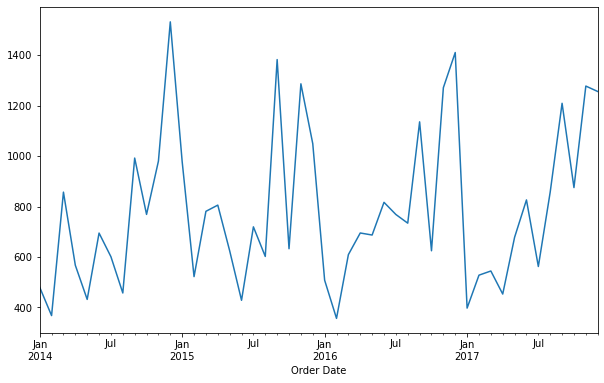

In [151]:
y.plot(figsize=(10,6))
plt.show()

In [152]:
train=y.loc[:'2016-12-31']
print(train.shape)
train.tail()

(36,)


Order Date
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [153]:
test=y.loc['2017-01-31':]
print(test.shape)
test.tail()

(12,)


Order Date
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

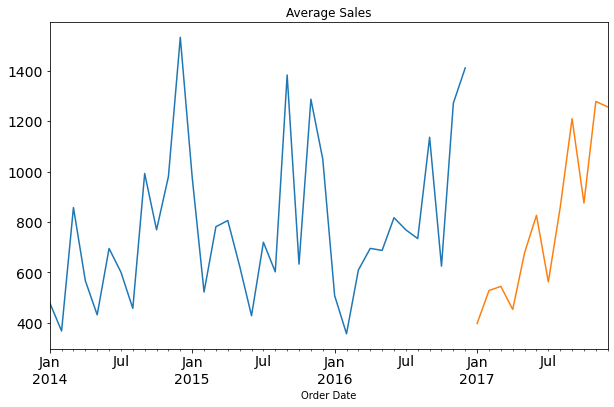

In [154]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\way2v\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


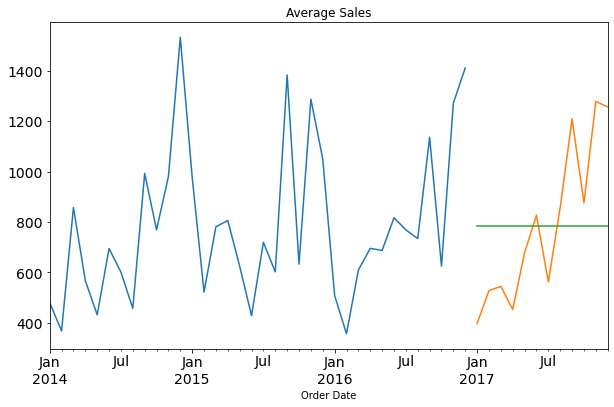

In [155]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values1
#values close to 0 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [156]:
Exp_Smooth.SES

2017-01-31    784.197375
2017-02-28    784.197375
2017-03-31    784.197375
2017-04-30    784.197375
2017-05-31    784.197375
2017-06-30    784.197375
2017-07-31    784.197375
2017-08-31    784.197375
2017-09-30    784.197375
2017-10-31    784.197375
2017-11-30    784.197375
2017-12-31    784.197375
Freq: M, dtype: float64

In [157]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

415.8766421603724

In [158]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.47667679253493


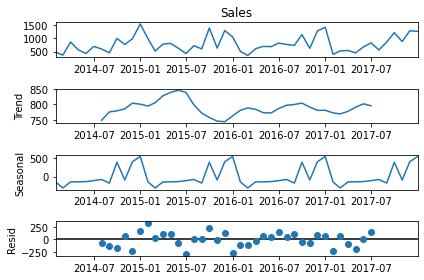

In [159]:
#trend and seasonality check karne keliye pure y pe karte hai
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

C:\Users\way2v\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-160-b84f9801d933>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.3)


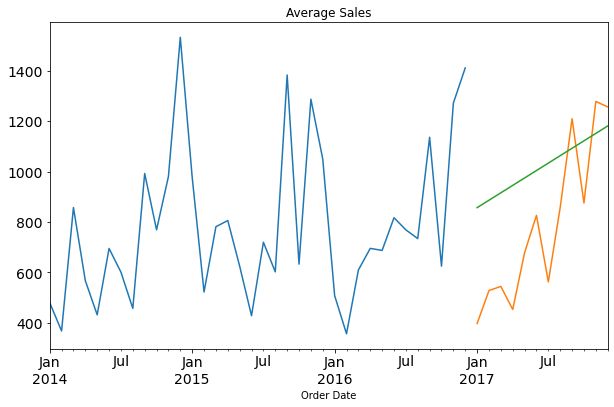

In [160]:

from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.3)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [161]:
fit1.aic

424.84084263155773

In [162]:
Holt_df['Holt_linear']

2017-01-31     856.792286
2017-02-28     886.233076
2017-03-31     915.673867
2017-04-30     945.114657
2017-05-31     974.555447
2017-06-30    1003.996237
2017-07-31    1033.437027
2017-08-31    1062.877817
2017-09-30    1092.318607
2017-10-31    1121.759398
2017-11-30    1151.200188
2017-12-31    1180.640978
Freq: M, dtype: float64

In [163]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_df['Holt_linear'] ))
print(rms)


315.94449668538215


In [164]:
"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

"\nimport numpy as np\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        print(fit1.aic,i,j)\n"

In [165]:
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

'\nfor k in my_dict:\n    if my_dict[k]==min(my_dict.values()):\n        print(k,":",my_dict[k])\n'

In [166]:
#not needed 
"""
new = pd.DataFrame(my_dict) # converting dictionary to data frame
new = new.transpose() # transpose rows to columns
new.columns = ["AIC","I","J"] # adding Column Headers
new.reset_index()  # index reset
new
"""

'\nnew = pd.DataFrame(my_dict) # converting dictionary to data frame\nnew = new.transpose() # transpose rows to columns\nnew.columns = ["AIC","I","J"] # adding Column Headers\nnew.reset_index()  # index reset\nnew\n'

C:\Users\way2v\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


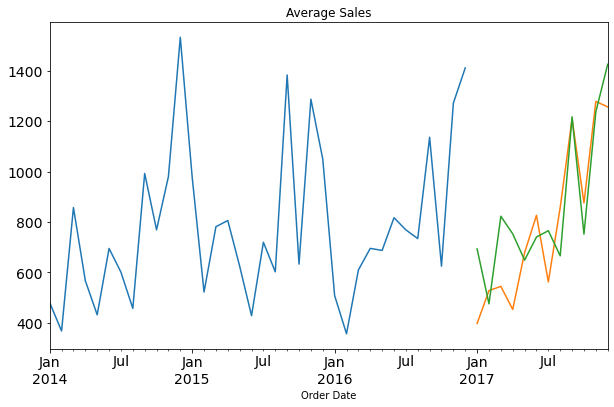

In [167]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [168]:
fit1.aic

400.3990824800991

In [169]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

180.09644704062225


In [170]:
Holt_Winter_df['Holt_Winter']

2017-01-31     693.135180
2017-02-28     475.656816
2017-03-31     822.784073
2017-04-30     752.993452
2017-05-31     648.806008
2017-06-30     740.291782
2017-07-31     765.490296
2017-08-31     665.739185
2017-09-30    1216.900547
2017-10-31     751.836345
2017-11-30    1236.631386
2017-12-31    1425.225124
Freq: M, dtype: float64

C:\Users\way2v\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


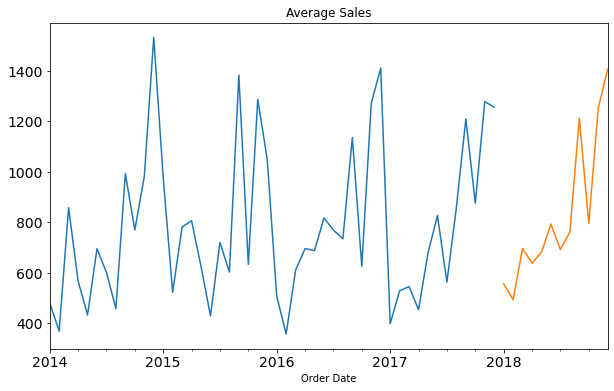

In [171]:
#rebuilding the model using entire data to predict from 2017 till 2018(12 months)
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predicti(start=pd.to_datetime('2017-01-31'))
Y_predictions= fit1.forecast(steps=12)#predict() is used for validation but not recommended

y.plot(figsize=(10,6),title= 'Average Sales',fontsize=14)
Y_predictions.plot(figsize=(10,6),title= 'Average Sales',fontsize=14)
plt.show()

In [172]:
Y_predictions

2018-01-31     555.719196
2018-02-28     492.654612
2018-03-31     695.854474
2018-04-30     637.402316
2018-05-31     681.200676
2018-06-30     792.911515
2018-07-31     691.210336
2018-08-31     761.396587
2018-09-30    1212.028163
2018-10-31     794.599269
2018-11-30    1251.775953
2018-12-31    1406.670190
Freq: M, dtype: float64

In [173]:
Y_predictions["Total"]=Y_predictions.sum()

In [175]:
Y_predictions

2018-01-31 00:00:00     555.719196
2018-02-28 00:00:00     492.654612
2018-03-31 00:00:00     695.854474
2018-04-30 00:00:00     637.402316
2018-05-31 00:00:00     681.200676
2018-06-30 00:00:00     792.911515
2018-07-31 00:00:00     691.210336
2018-08-31 00:00:00     761.396587
2018-09-30 00:00:00    1212.028163
2018-10-31 00:00:00     794.599269
2018-11-30 00:00:00    1251.775953
2018-12-31 00:00:00    1406.670190
Total                  9973.423286
dtype: float64

In [177]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",header=["Sales"],index=True)

In [178]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""


'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [ ]:
#pip install pmdarima --user

In [180]:
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [181]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

NameError: name 'pm' is not defined

In [38]:
#p+q+P+Q<=10

In [39]:
model.aic()

489.41762612467346

In [40]:
model

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

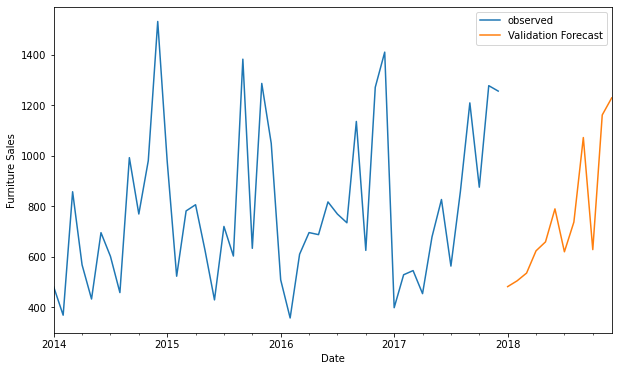

In [47]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
pred.predicted_mean

2018-01-31     481.175781
2018-02-28     504.162669
2018-03-31     534.896808
2018-04-30     623.058246
2018-05-31     658.537443
2018-06-30     789.387671
2018-07-31     619.269512
2018-08-31     736.930516
2018-09-30    1072.136415
2018-10-31     627.864094
2018-11-30    1161.662883
2018-12-31    1229.291155
Freq: M, Name: predicted_mean, dtype: float64

In [46]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

230.06285341222085


C:\Users\way2v\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


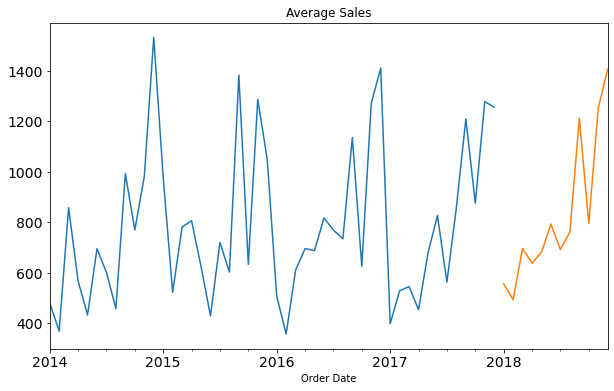

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [50]:
Y_predictions

2018-01-31     555.719196
2018-02-28     492.654612
2018-03-31     695.854474
2018-04-30     637.402316
2018-05-31     681.200676
2018-06-30     792.911515
2018-07-31     691.210336
2018-08-31     761.396587
2018-09-30    1212.028163
2018-10-31     794.599269
2018-11-30    1251.775953
2018-12-31    1406.670190
Freq: M, dtype: float64

In [51]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)